# Overview

In this notebook, we investigate the Accelerated ADMM methods and the IQC framework proposed in the paper.  
To evaluate performance, we apply a bisection search to solve the semidefinite program (SDP) derived from **Theorem 2** in the paper, enabling a direct comparison of the worst-case convergence rates between our proposed method and several benchmark algorithms.

The bisection procedure is implemented in the helper code `convergence_analysis`, which computes the worst-case rate $\rho$ for each algorithm under consideration.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

from lib.convergence_analysis import compute_rho_for_acc_admm
from lib.grid_search import extract_data

In [2]:
kappas = np.logspace(0, 3, 20)
n_ZF = 6
rho_max= 1.3
eps= 1e-6
alpha= 1.4

## Fig.1 (a)

[INFO] algo='A-ADMM (NM)', κ=1.00, ρ=0.5002
[INFO] algo='A-ADMM (NM)', κ=1.44, ρ=0.5446
[INFO] algo='A-ADMM (NM)', κ=2.07, ρ=0.5897
[INFO] algo='A-ADMM (NM)', κ=2.98, ρ=0.6335
[INFO] algo='A-ADMM (NM)', κ=4.28, ρ=0.6741
[INFO] algo='A-ADMM (NM)', κ=6.16, ρ=0.7128
[INFO] algo='A-ADMM (NM)', κ=8.86, ρ=0.7528
[INFO] algo='A-ADMM (NM)', κ=12.74, ρ=0.7947
[INFO] algo='A-ADMM (NM)', κ=18.33, ρ=0.8315
[INFO] algo='A-ADMM (NM)', κ=26.37, ρ=0.8614
[INFO] algo='A-ADMM (NM)', κ=37.93, ρ=0.8861
[INFO] algo='A-ADMM (NM)', κ=54.56, ρ=0.9071
[INFO] algo='A-ADMM (NM)', κ=78.48, ρ=0.9242
[INFO] algo='A-ADMM (NM)', κ=112.88, ρ=0.9382
[INFO] algo='A-ADMM (NM)', κ=162.38, ρ=0.9502
[INFO] algo='A-ADMM (NM)', κ=233.57, ρ=0.9604
[INFO] algo='A-ADMM (NM)', κ=335.98, ρ=0.9693
[INFO] algo='A-ADMM (NM)', κ=483.29, ρ=0.9769
[INFO] algo='A-ADMM (NM)', κ=695.19, ρ=0.9839
[INFO] algo='A-ADMM (NM)', κ=1000.00, ρ=0.9896


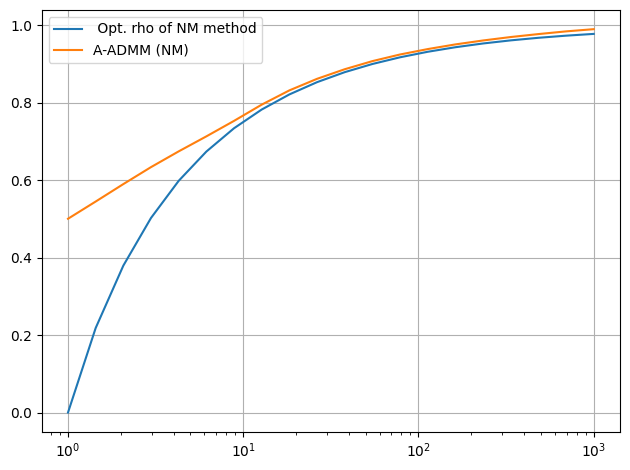

In [3]:
rhos = []
for kappa in kappas:
    rho = compute_rho_for_acc_admm(
                        1, kappa,
                        n_ZF,
                        algo='A-ADMM (NM)',
                        rho_max=1.3,
                        eps=1e-6,
                        alpha=alpha
                    )
                    
    print(f"[INFO] algo='A-ADMM (NM)', κ={kappa:.2f}, ρ={rho:.4f}")
    rhos.append(rho)


rhos_NM_Lit_all = [np.sqrt(1-(1/kappa) * np.sqrt(2*kappa-1)) for kappa in kappas]


plt.xscale('log')
plt.grid(True); plt.tight_layout()
plt.plot(kappas, rhos_NM_Lit_all, label=' Opt. rho of NM method')
plt.plot(kappas, rhos, label="A-ADMM (NM)")
plt.legend()
plt.tight_layout()
plt.show()

## Fig.1 (b)

[INFO] algo=A-ADMM (TM), kappa=1.00, rho=0.5002
[INFO] algo=A-ADMM (TM), kappa=1.44, rho=0.5453
[INFO] algo=A-ADMM (TM), kappa=2.07, rho=0.5891
[INFO] algo=A-ADMM (TM), kappa=2.98, rho=0.6329
[INFO] algo=A-ADMM (TM), kappa=4.28, rho=0.6741
[INFO] algo=A-ADMM (TM), kappa=6.16, rho=0.7128
[INFO] algo=A-ADMM (TM), kappa=8.86, rho=0.7484
[INFO] algo=A-ADMM (TM), kappa=12.74, rho=0.7814
[INFO] algo=A-ADMM (TM), kappa=18.33, rho=0.8106
[INFO] algo=A-ADMM (TM), kappa=26.37, rho=0.8373
[INFO] algo=A-ADMM (TM), kappa=37.93, rho=0.8607
[INFO] algo=A-ADMM (TM), kappa=54.56, rho=0.8880
[INFO] algo=A-ADMM (TM), kappa=78.48, rho=0.9185
[INFO] algo=A-ADMM (TM), kappa=112.88, rho=0.9464
[INFO] algo=A-ADMM (TM), kappa=162.38, rho=0.9712
[INFO] algo=A-ADMM (TM), kappa=233.57, rho=0.9921
[INFO] algo=A-ADMM (TM), kappa=335.98, rho=1.0099
[INFO] algo=A-ADMM (TM), kappa=483.29, rho=1.0258
[INFO] algo=A-ADMM (TM), kappa=695.19, rho=1.0474
[INFO] algo=A-ADMM (TM), kappa=1000.00, rho=1.0651
[INFO] algo=A-ADMM 

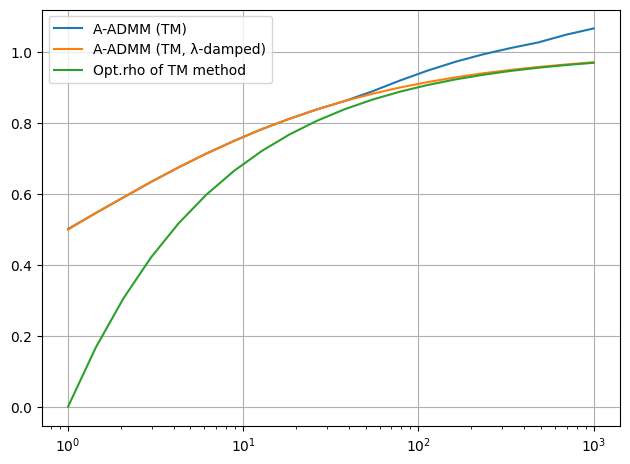

In [4]:
algos = ['A-ADMM (TM)', 'A-ADMM (TM, λ-damped)']
results = dict()

for algo in algos:
    rhos = []
    for kappa in kappas:
        rho = compute_rho_for_acc_admm(
                            1, kappa,
                            n_ZF,
                            algo=algo,
                            rho_max=1.3,
                            eps=1e-6,
                            alpha=alpha
                        )
        print(f"[INFO] algo={algo}, kappa={kappa:.2f}, rho={rho:.4f}")
        rhos.append(rho)
    results[algo] = np.array(rhos)

rhos_TM_Lit_all = [1 - 1/np.sqrt(kappa) for kappa in kappas]

plt.xscale('log')
plt.grid(True); plt.tight_layout()
for algo in algos:
        y = results[algo] 
        plt.plot(
            kappas, y,
            label=f"{algo}"
        )
plt.plot(kappas, rhos_TM_Lit_all, label='Opt.rho of TM method')
plt.legend()
plt.show()


## Fig.3

[INFO] algo=ADMM, kappa=1.00, rho=0.5002
[INFO] algo=ADMM, kappa=1.44, rho=0.5453
[INFO] algo=ADMM, kappa=2.07, rho=0.5897
[INFO] algo=ADMM, kappa=2.98, rho=0.6322
[INFO] algo=ADMM, kappa=4.28, rho=0.6741
[INFO] algo=ADMM, kappa=6.16, rho=0.7128
[INFO] algo=ADMM, kappa=8.86, rho=0.7490
[INFO] algo=ADMM, kappa=12.74, rho=0.7814
[INFO] algo=ADMM, kappa=18.33, rho=0.8106
[INFO] algo=ADMM, kappa=26.37, rho=0.8373
[INFO] algo=ADMM, kappa=37.93, rho=0.8607
[INFO] algo=ADMM, kappa=54.56, rho=0.8811
[INFO] algo=ADMM, kappa=78.48, rho=0.8988
[INFO] algo=ADMM, kappa=112.88, rho=0.9141
[INFO] algo=ADMM, kappa=162.38, rho=0.9274
[INFO] algo=ADMM, kappa=233.57, rho=0.9388
[INFO] algo=ADMM, kappa=335.98, rho=0.9483
[INFO] algo=ADMM, kappa=483.29, rho=0.9566
[INFO] algo=ADMM, kappa=695.19, rho=0.9636
[INFO] algo=ADMM, kappa=1000.00, rho=0.9699
[INFO] algo=A-ADMM (NM), kappa=1.00, rho=0.5002
[INFO] algo=A-ADMM (NM), kappa=1.44, rho=0.5446
[INFO] algo=A-ADMM (NM), kappa=2.07, rho=0.5897
[INFO] algo=A-A

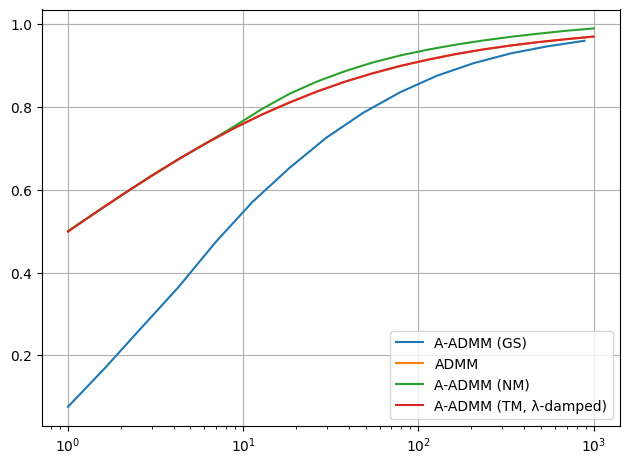

In [ ]:
algos = ['ADMM', 'A-ADMM (NM)', 'A-ADMM (TM, λ-damped)']

results = dict()

for algo in algos:
    rhos = []
    for kappa in kappas:
        rho = compute_rho_for_acc_admm(
                            1, kappa,
                            n_ZF,
                            algo=algo,
                            rho_max=1.3,
                            eps=1e-6,
                            alpha=alpha
                        )
        print(f"[INFO] algo={algo}, kappa={kappa:.2f}, rho={rho:.4f}")
        rhos.append(rho)
    results[algo] = np.array(rhos)


with open("../results/grid_search_results.json", "r") as f:
    data1 = json.load(f)
_,_,_,_,kappa_GS, rate_GS = extract_data(data1)
kappa_strs = list(data1["G_results"].keys())
kappas1 = sorted([float(k) for k in kappa_strs])

# Extract grid search results: worst-case rates, v1 and v2
best_rates = []
for k in kappas1:
    k_str = str(k)
    best_rates.append(data1["G_results"][k_str]["G_rate"])

plt.xscale('log')
plt.grid(True); plt.tight_layout()
plt.plot(kappa_GS, rate_GS, label="A-ADMM (GS)")
for algo in algos:
        y = results[algo] 
        plt.plot(
            kappas, y, '*-'
            label=f"{algo}"
        )
plt.legend()
plt.show()


## Fig.4

[INFO] algo=ADMM, κ=1.00, ρ=0.5002
[INFO] algo=ADMM, κ=1.44, ρ=0.5891
[INFO] algo=ADMM, κ=2.07, ρ=0.6729
[INFO] algo=ADMM, κ=2.98, ρ=0.7465
[INFO] algo=ADMM, κ=4.28, ρ=0.8087
[INFO] algo=ADMM, κ=6.16, ρ=0.8569
[INFO] algo=ADMM, κ=8.86, ρ=0.8982
[INFO] algo=ADMM, κ=12.74, ρ=0.9229
[INFO] algo=ADMM, κ=18.33, ρ=0.9420
[INFO] algo=ADMM, κ=26.37, ρ=0.9598
[INFO] algo=ADMM, κ=37.93, ρ=0.9712
[INFO] algo=ADMM, κ=54.56, ρ=0.9788
[INFO] algo=ADMM, κ=78.48, ρ=0.9864
[INFO] algo=ADMM, κ=112.88, ρ=0.9896
[INFO] algo=ADMM, κ=162.38, ρ=0.9934
[INFO] algo=ADMM, κ=233.57, ρ=0.9959
[INFO] algo=ADMM, κ=335.98, ρ=0.9972
[INFO] algo=ADMM, κ=483.29, ρ=0.9979
[INFO] algo=ADMM, κ=695.19, ρ=0.9985
[INFO] algo=ADMM, κ=1000.00, ρ=0.9991
[INFO] algo=OR-ADMM, κ=1.00, ρ=0.3009
[INFO] algo=OR-ADMM, κ=1.44, ρ=0.4240
[INFO] algo=OR-ADMM, κ=2.07, ρ=0.5440
[INFO] algo=OR-ADMM, κ=2.98, ρ=0.6481
[INFO] algo=OR-ADMM, κ=4.28, ρ=0.7332
[INFO] algo=OR-ADMM, κ=6.16, ρ=0.8036
[INFO] algo=OR-ADMM, κ=8.86, ρ=0.8563
[INFO] algo=O

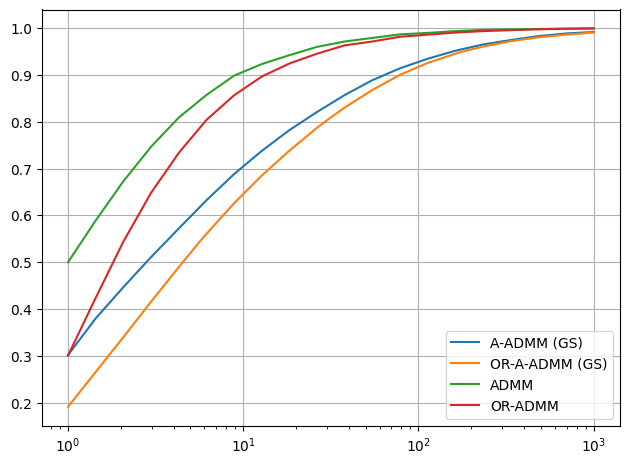

In [ ]:
algos = ['ADMM', 'OR-ADMM']
results = {
    "alg": np.zeros(len(kappas))
}
for algo in algos:
    rhos = []
    for kappa in kappas:
        rho = compute_rho_for_acc_admm(
                            1, kappa,
                            n_ZF,
                            algo=algo,
                            rho_max=1.3,
                            eps=1e-6,
                            alpha=alpha
                        )
        print(f"[INFO] algo={algo}, kappa={kappa:.2f}, rho={rho:.4f}")
        rhos.append(rho)
    results[algo] = np.array(rhos)


with open("../results/grid_search_results.json", "r") as f:
    data1 = json.load(f)
kappa_GS, rate_GS, v1_GS, v2_GS,_,_ = extract_data(data1)


with open("../results/grid_search_results_OR.json", "r") as f:
    data2 = json.load(f)
kappa_OR, rate_OR, v1_OR, v2_OR,_,_ = extract_data(data2)

plt.xscale('log')
plt.grid(True); plt.tight_layout()
plt.plot(kappas, rate_GS, label="A-ADMM (GS)")
plt.plot(kappa_OR, rate_OR, label="OR-A-ADMM (GS)")
for algo in algos:
        y = results[algo] 
        plt.plot(
            kappas, y,
            label=f"{algo}"
        )
plt.legend()
plt.show()
